## Génétique des populations

Nous allons ré-ecrire en python le simulateur vu en cours de génétique des populations.

### 1. Simulation déterministe

In [7]:
def p_prime(p, wAA, wAB, wBB):
    # Calcul de la fréquence de l'allèle A à la génération suivante
    # wAA est la fitness du génotype AA, wAB est la fitness du génotype AB, wBB est la fitness du génotype BB
    # w_bar est la moyenne pondérée des fitness des génotypes, voir genetique-des-populations-formalisme.pdf
    w_bar = p * p * wAA + 2 * p * (1 - p) * wAB + (1 - p) * (1 - p) * wBB
    # pA est la fréquence de l'allèle A à la génération suivante, voir genetique-des-populations-formalisme.pdf
    pA = p * (p * wAA + wAB * (1 - p)) / w_bar
    return pA


def run_simulation_deterministe(nb_generations, wAA, wAB, wBB, p_initial):
    # nb_generations est le nombre de générations
    # wAA est la fitness du génotype AA, wAB est la fitness du génotype AB, wBB est la fitness du génotype BB
    # p_initial est la fréquence de l'allèle A à la génération initiale

    # Fréquence de l'allèle A à la génération initiale
    p = p_initial
    # Liste des fréquences de l'allèle A à chaque génération
    p_list = [p_initial]
    # Pour chaque génération
    for i in range(nb_generations):
        # Calcul de la fréquence de l'allèle A à la génération suivante
        p = p_prime(p, wAA, wAB, wBB)
        # On ajoute la fréquence de l'allèle A à la liste
        p_list.append(p)
    return p_list

In [9]:
# Initialisation des paramètres
w_AA = 1.050
w_AB = 1.025
w_BB = 1.0
fA = 0.05
nbr_generations = 50
# Simulation déterministe
simu_deterministic = run_simulation_deterministe(nbr_generations, w_AA, w_AB, w_BB, fA)
print(simu_deterministic)

[0.05, 0.051184538653366585, 0.052395556425473486, 0.053633569658172474, 0.05489910115618216, 0.056192680086365715, 0.05751484186544892, 0.05886612803569512, 0.060247086128045794, 0.061658269512229455, 0.06310023723333534, 0.06457355383434396, 0.06607878916410266, 0.06761651817023101, 0.06918732067644001, 0.07079178114374816, 0.07243048841507872, 0.0741040354427246, 0.07581301899817212, 0.07755803936377949, 0.07933970000581475, 0.081158607228366, 0.08301536980764951, 0.08491059860625391, 0.0868449061668754, 0.08881890628511684, 0.09083321356094458, 0.09288844292842033, 0.09498520916335178, 0.09712412636853457, 0.09930580743629062, 0.10153086348804302, 0.10379990329070574, 0.10611353264970862, 0.10847235377852293, 0.11087696464460142, 0.11332795829169878, 0.11582592213859436, 0.11837143725429809, 0.12096507760988376, 0.1236074093071601, 0.12629898978446136, 0.12904036699991203, 0.13183207859259913, 0.134674651022166, 0.13756859868742682, 0.1405144230246891, 0.14351261158656275, 0.146563

### 2. Plot des simulations

In [10]:
import matplotlib.pyplot as plt


def plot_simulation(simulation_deterministic, list_simulations_stochastic):
    # Plot des simulations déterministes et stochastiques de l'évolution de la fréquence de l'allèle A
    # Fonctionne avec une simulation déterministe et une liste de simulations stochastiques
    # S'il n'y a pas de simulation stochastique, on peut appeler la fonction avec une liste vide

    # Initialisation de la figure
    plt.figure(figsize=(6, 4), dpi=150)
    # Plot de la simulation déterministe en noir
    plt.plot(range(len(simulation_deterministic)), simulation_deterministic, color="black")

    # Pour chaque simulation stochastique
    for simulation in list_simulations_stochastic:
        # Couleur de la simulation, rouge si fixation de l'allèle A, bleu si fixation de l'allèle B, vert sinon
        color = "green"
        if simulation[-1] == 1:
            color = "red"
        elif simulation[-1] == 0:
            color = "blue"
        # Plot de la simulation stochastique
        plt.plot(range(len(simulation)), simulation, color=color)

    # Légende
    plt.xlabel("Générations")
    plt.ylabel("f(A)")
    # Titre de la figure
    plt.title(f"{len(list_simulations_stochastic)} simulations stochastiques")
    # Limite de l'axe des ordonnées entre 0 et 1, limite de l'axe des abscisses entre 0 et le nombre de générations
    plt.ylim(0, 1)
    plt.xlim(0, len(simulation_deterministic))

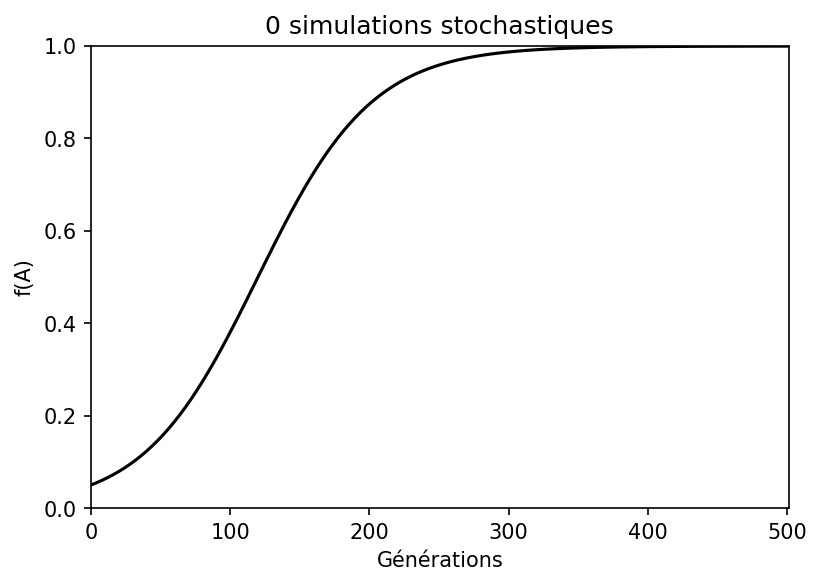

In [11]:
# Pour afficher le plot dans le notebook
%matplotlib inline

# Initialisation des paramètres
w_AA = 1.050
w_AB = 1.025
w_BB = 1.0
fA = 0.05
nbr_generations = 500
# Simulation déterministe
simu_deterministic = run_simulation_deterministe(nbr_generations, w_AA, w_AB, w_BB, fA)

# Plot de la simulation déterministe, sans simulation stochastique (liste vide)
plot_simulation(simu_deterministic, [])

Est-ce que les résulats sont visuellement condordants avec le simulateur en ligne (https://umr5558-shiny.univ-lyon1.fr/tp_derive/) ?

### 3. Simulations stochastique (à vous de jouer)
Il vous faut changer la fonction `run_simulation_stochastique` en tirant un échantillon de 2N individus (2N allèles) selon une loi binomiale de paramètres 2N et p, en utilisant la fonction `binomial_distribution`.

Voir le fichier `genetique-des-populations-formalisme.pdf` (section 2) pour le calcul.

In [13]:
from random import random


def binomial_distribution(n, p):
    # Distribution binomiale de paramètres n (nombre d'essais) et p (probabilité de succès).
    # La somme de n variables aléatoires de Bernoulli de paramètre p suit une loi binomiale de paramètres n et p.
    # Si random() < p (succès de la variable aléatoire de Bernoulli), on incrémente le compteur.
    # Voir https://docs.python.org/3.12/library/random.html#random.binomialvariate
    return sum([random() < p for i in range(n)])


def run_simulation_stochastique(nb_generations, wAA, wAB, wBB, p_initial, population_size):
    # nb_generations est le nombre de générations
    # wAA est la fitness du génotype AA, wAB est la fitness du génotype AB, wBB est la fitness du génotype BB
    # p_initial est la fréquence de l'allèle A à la génération initiale
    # population_size est la taille de la population

    # Fréquence de l'allèle A à la génération initiale
    p = p_initial
    # Liste des fréquences de l'allèle A à chaque génération
    p_list = [p_initial]
    # Pour chaque génération
    for i in range(nb_generations):
        # Calcul de la fréquence de l'allèle A à la génération suivante
        p = p_prime(p, wAA, wAB, wBB)
        # On tire un échantillon de 2N individus (2N allèles) selon une loi binomiale de paramètres 2N et p
        # Voir le fichier genetique-des-populations-formalisme.pdf (section 2) et la fonction binomial_distribution
        n = binomial_distribution(2 * population_size, p)
        # On met à jour la fréquence de l'allèle A à la génération suivante en fonction de la taille de l'échantillon
        p = n / (2 * population_size)
        # On ajoute la fréquence de l'allèle A à la liste
        p_list.append(p)
    return p_list

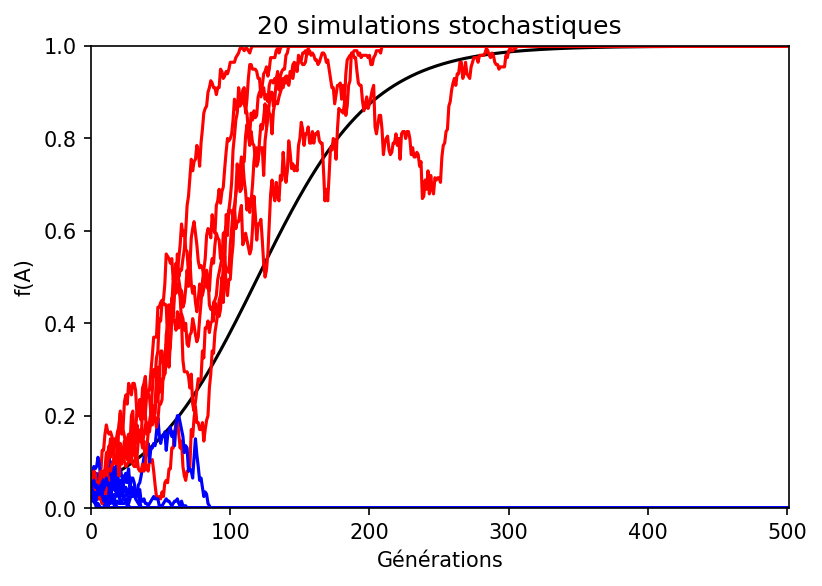

In [14]:
# Pour afficher le plot dans le notebook
%matplotlib inline

# Initialisation de la liste des simulations stochastiques et de la taille de la population
simu_stochastic = []
N = 100
# 20 simulations stochastiques
for i in range(20):
    simu_stochastic.append(run_simulation_stochastique(nbr_generations, w_AA, w_AB, w_BB, fA, N))
# Plot de la simulation déterministe et des simulations stochastiques
plot_simulation(simu_deterministic, simu_stochastic)

### 4. Augmentation de la taille de population
Relancer les simulations en augmentant la taille de populations (N=5000 par exemple), qu'observez-vous ?

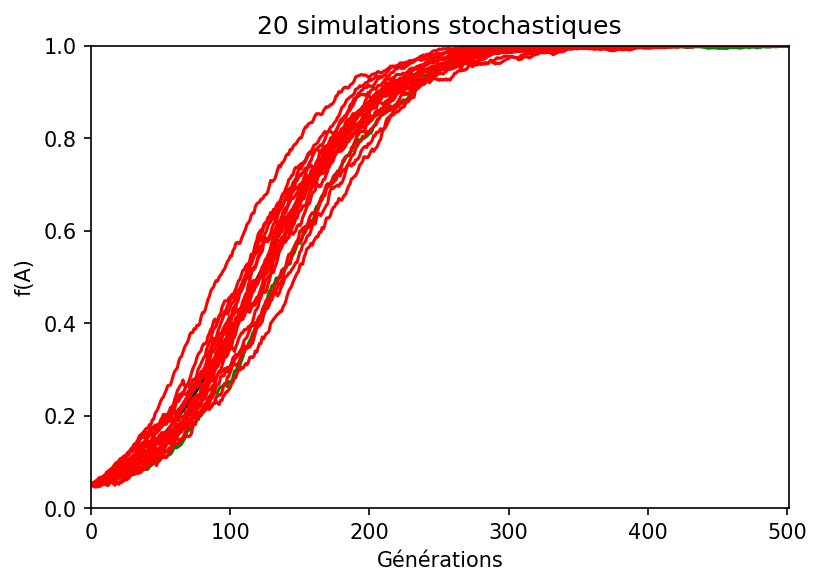

In [11]:
# Pour afficher le plot dans le notebook
%matplotlib inline

# Initialisation de la liste des simulations stochastiques et de la taille de la population
simu_stochastic = []
N = 5000
# 20 simulations stochastiques
for i in range(20):
    simu_stochastic.append(run_simulation_stochastique(nbr_generations, w_AA, w_AB, w_BB, fA, N))
# Plot de la simulation déterministe et des simulations stochastiques
plot_simulation(simu_deterministic, simu_stochastic)

### 5. Changement de paramètres
Relancer les simulations en changeant les paramètres de simulation

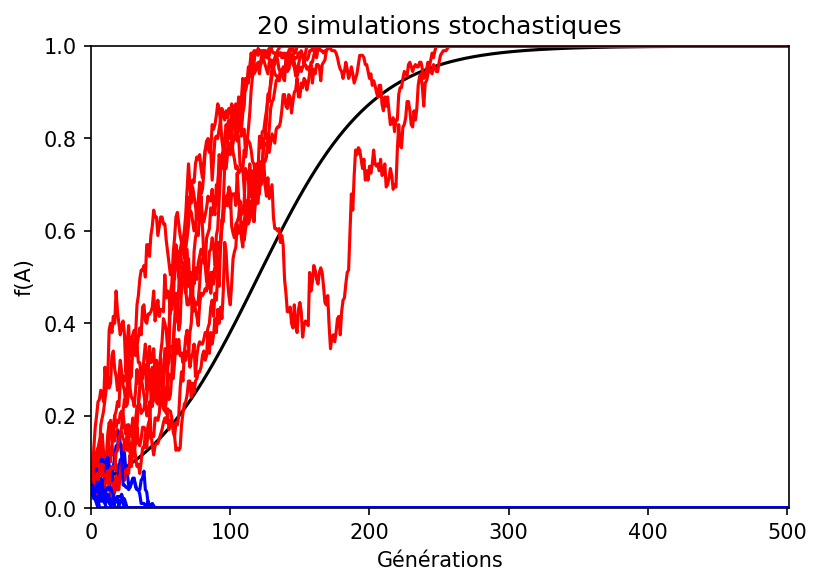

In [15]:
# Pour afficher le plot dans le notebook
%matplotlib inline

# Initialisation des paramètres
w_AA = 1.050
w_AB = 1.025
w_BB = 1.0
fA = 0.05
nbr_generations = 500
# Simulation déterministe
simu_deterministic = run_simulation_deterministe(nbr_generations, w_AA, w_AB, w_BB, fA)

# Initialisation de la liste des simulations stochastiques et de la taille de la population
simu_stochastic = []
population_size = 100
# 20 simulations stochastiques
for i in range(20):
    simu_stochastic.append(run_simulation_stochastique(nbr_generations, w_AA, w_AB, w_BB, fA, N))
# Plot de la simulation déterministe et des simulations stochastiques
plot_simulation(simu_deterministic, simu_stochastic)